In [58]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
bb=pd.read_csv('baseball.csv')   #importing table through pandas
bb.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
bb.rename(columns = {'W':'Win','R':'Runs','AB':'At_Bats','H':'Hits','2B':'Doubles','3B':'Triples','HR':'Homeruns','BB':'Walks','SO':'Strikeouts','SB':'StolenBases','RA':'RunsAllowed','EA':'Earned_Runs','ERA':'EarnedRunsAvg','CG':'CompleteGames','SHO':'ShutOuts','ER':'Earned_Runs','SV':'Saves','E':'Error'},inplace=True)

In [4]:
bb.head(2)

,Win,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,RunsAllowed,Earned_Runs,EarnedRunsAvg,CompleteGames,ShutOuts,Saves,Error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86


In [5]:
bb.info()    #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
Win              30 non-null int64
Runs             30 non-null int64
At_Bats          30 non-null int64
Hits             30 non-null int64
Doubles          30 non-null int64
Triples          30 non-null int64
Homeruns         30 non-null int64
Walks            30 non-null int64
Strikeouts       30 non-null int64
StolenBases      30 non-null int64
RunsAllowed      30 non-null int64
Earned_Runs      30 non-null int64
EarnedRunsAvg    30 non-null float64
CompleteGames    30 non-null int64
ShutOuts         30 non-null int64
Saves            30 non-null int64
Error            30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
bb.dtypes    #data types available in dataset

Win                int64
Runs               int64
At_Bats            int64
Hits               int64
Doubles            int64
Triples            int64
Homeruns           int64
Walks              int64
Strikeouts         int64
StolenBases        int64
RunsAllowed        int64
Earned_Runs        int64
EarnedRunsAvg    float64
CompleteGames      int64
ShutOuts           int64
Saves              int64
Error              int64
dtype: object

In [7]:
bb.shape   #shape of the data

(30, 17)

In [8]:
bb.describe()    #describing the dataset statistically

,Win,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,RunsAllowed,Earned_Runs,EarnedRunsAvg,CompleteGames,ShutOuts,Saves,Error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
bb.isnull().sum()    #checking total no. of null values

Win              0
Runs             0
At_Bats          0
Hits             0
Doubles          0
Triples          0
Homeruns         0
Walks            0
Strikeouts       0
StolenBases      0
RunsAllowed      0
Earned_Runs      0
EarnedRunsAvg    0
CompleteGames    0
ShutOuts         0
Saves            0
Error            0
dtype: int64

# EDA

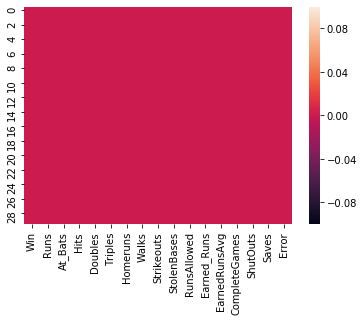

In [10]:
sns.heatmap(bb.isnull())    #checking null values through heatmap

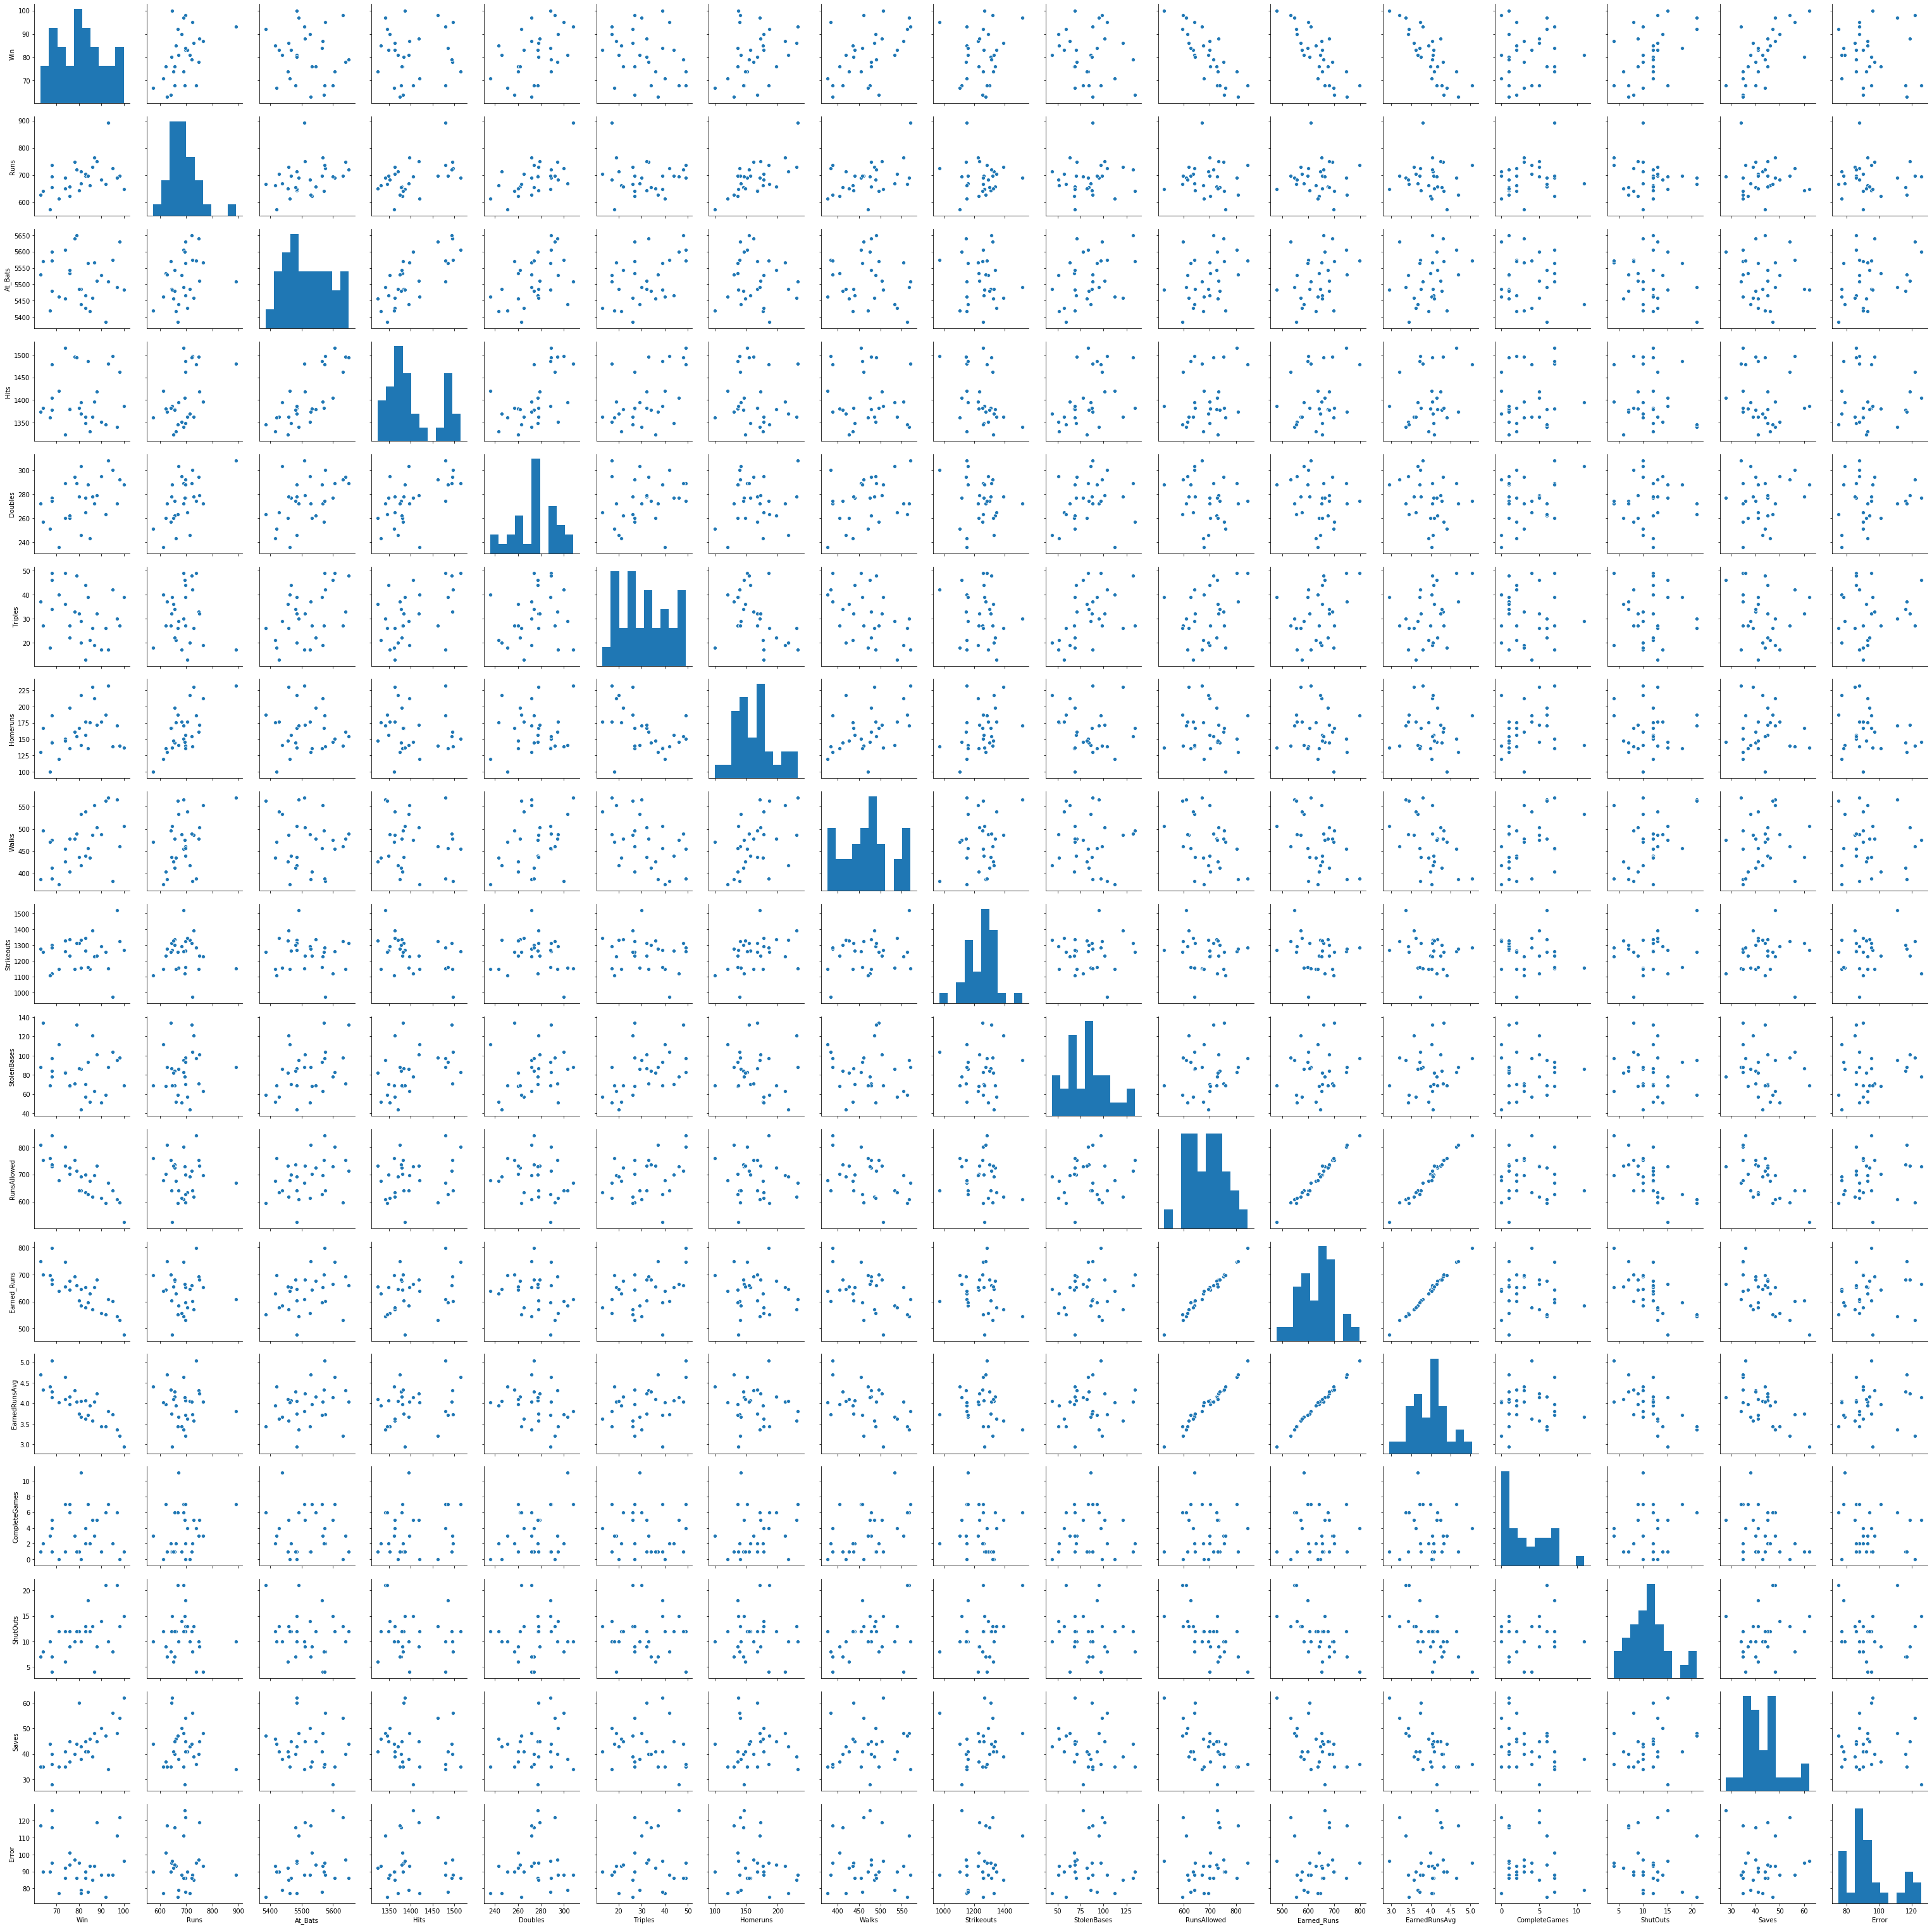

In [11]:
sns.pairplot(bb)   #pairplot is drawn to know the relation between every 2 variables present in the dataset

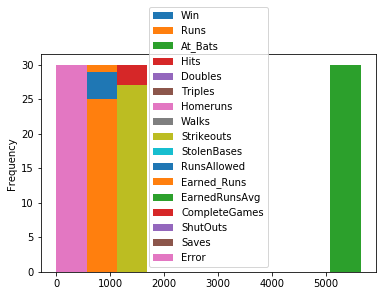

In [12]:
bb.plot.hist()   #checking skewness

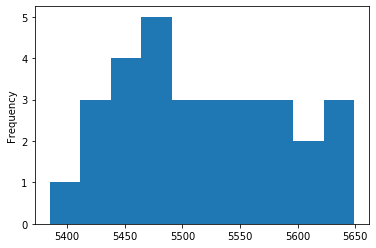

In [13]:
bb["At_Bats"].plot.hist()

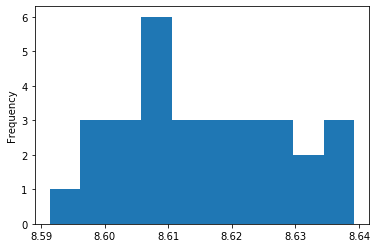

In [14]:
np.log(bb["At_Bats"]).plot.hist()

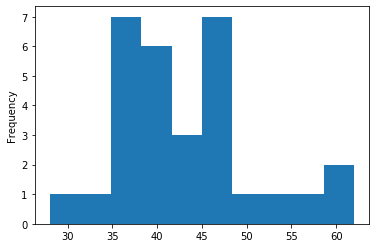

In [15]:
bb["Saves"].plot.hist()

In [16]:
bb.skew()    #cheking skewness in numbers

Win              0.047089
Runs             1.200786
At_Bats          0.183437
Hits             0.670254
Doubles         -0.230650
Triples          0.129502
Homeruns         0.516441
Walks            0.158498
Strikeouts      -0.156065
StolenBases      0.479893
RunsAllowed      0.045734
Earned_Runs      0.058710
EarnedRunsAvg    0.053331
CompleteGames    0.736845
ShutOuts         0.565790
Saves            0.657524
Error            0.890132
dtype: float64

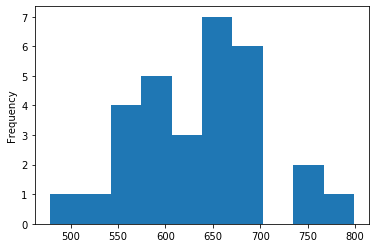

In [17]:
bb["Earned_Runs"].plot.hist()    

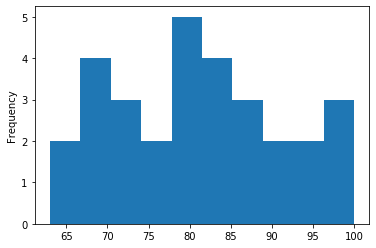

In [18]:
bb["Win"].plot.hist()

Win                 AxesSubplot(0.125,0.657941;0.110714x0.222059)
Runs             AxesSubplot(0.257857,0.657941;0.110714x0.222059)
At_Bats          AxesSubplot(0.390714,0.657941;0.110714x0.222059)
Hits             AxesSubplot(0.523571,0.657941;0.110714x0.222059)
Doubles          AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Triples          AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Homeruns            AxesSubplot(0.125,0.391471;0.110714x0.222059)
Walks            AxesSubplot(0.257857,0.391471;0.110714x0.222059)
Strikeouts       AxesSubplot(0.390714,0.391471;0.110714x0.222059)
StolenBases      AxesSubplot(0.523571,0.391471;0.110714x0.222059)
RunsAllowed      AxesSubplot(0.656429,0.391471;0.110714x0.222059)
Earned_Runs      AxesSubplot(0.789286,0.391471;0.110714x0.222059)
EarnedRunsAvg          AxesSubplot(0.125,0.125;0.110714x0.222059)
CompleteGames       AxesSubplot(0.257857,0.125;0.110714x0.222059)
ShutOuts            AxesSubplot(0.390714,0.125;0.110714x0.222059)
Saves     

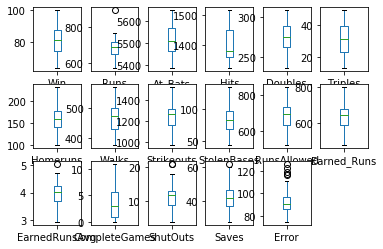

In [19]:
bb.plot(kind="Box",subplots=True,layout=(3,6))    #finding outliers

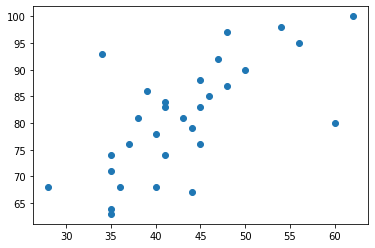

In [20]:
plt.scatter(bb['Saves'],bb['Win'])   #relation between SV and WIN

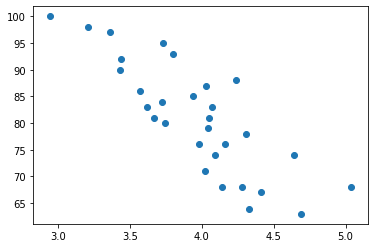

In [21]:
plt.scatter(bb['EarnedRunsAvg'],bb['Win'])   #relation between ERA and win

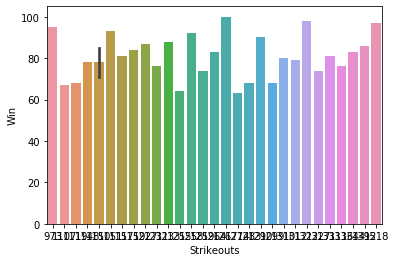

In [22]:
sns.barplot(x="Strikeouts",y="Win", data=bb)   #checking the relation between SO and win

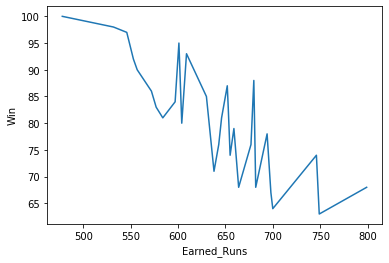

In [23]:
sns.lineplot(x="Earned_Runs",y="Win",data=bb)   # relation between E and Win

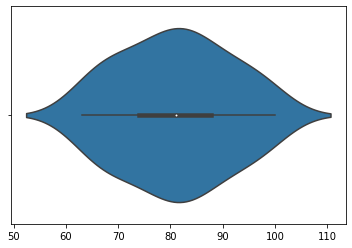

In [24]:
sns.violinplot(["Win"],data=bb)    #we can see the winning possibilities by this violinplot

In [25]:
y=bb.iloc[:,-17]
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Win, dtype: int64

In [26]:
x=bb.iloc[:,1:18]
x

,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,RunsAllowed,Earned_Runs,EarnedRunsAvg,CompleteGames,ShutOuts,Saves,Error
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [27]:
from scipy.stats import zscore   #zscore to remove outliers
z=np.abs(zscore(bb))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [28]:
threshold=3

In [29]:
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [30]:
bb.skew()     #checking skewness

Win              0.047089
Runs             1.200786
At_Bats          0.183437
Hits             0.670254
Doubles         -0.230650
Triples          0.129502
Homeruns         0.516441
Walks            0.158498
Strikeouts      -0.156065
StolenBases      0.479893
RunsAllowed      0.045734
Earned_Runs      0.058710
EarnedRunsAvg    0.053331
CompleteGames    0.736845
ShutOuts         0.565790
Saves            0.657524
Error            0.890132
dtype: float64

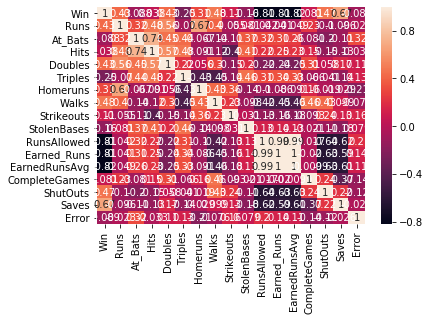

In [31]:
sns.heatmap(bb.corr(),annot=True)    #check corelation among various variables

# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
lr=LinearRegression()  

In [34]:
x.shape

(30, 16)

In [35]:
y.shape

(30,)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)

In [37]:
x_train.shape

(24, 16)

In [38]:
y_train.shape

(24,)

In [39]:
x_test.shape

(6, 16)

In [40]:
y_test.shape

(6,)

In [41]:
lr.fit(x_train,y_train)   #fitting the model in train test split

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lr.score(x_train,y_train)    #checking the score of linear regression

0.9596605014140278

In [43]:
lr.coef_

array([ 1.49837182e-01, -4.33123435e-02,  1.01298591e-02, -1.17549958e-01,
        4.06684252e-02, -5.36459756e-02, -3.71514191e-02, -1.45350898e-03,
       -9.14395547e-03,  2.34206567e-01,  2.06752161e-01, -8.02212086e+01,
        8.61597316e-01,  2.40682386e-01,  6.64591840e-01, -5.68854732e-02])

In [44]:
lr.intercept_

258.6671479174723

In [45]:
pred=lr.predict(x_test)    #predictions
print("pridicted result :",pred)
print("actual ",y_test)

pridicted result : [ 79.82455753  82.92655511  80.41756246  78.85142074 100.96079202
  83.27321165]
actual  9     78
26    84
28    74
13    76
5     93
12    85
Name: Win, dtype: int64


In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=10) 

array([  0.81849548,   0.54345971,  -5.03578497,   0.14987268,
        -2.36573236, -43.40241512,   0.81944679,   0.75303978,
         0.87348374,  -0.59821638])

# R2 score

In [47]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.5181029019661076


# RIDGE

In [48]:
from sklearn.linear_model import Ridge

In [49]:
rd=Ridge()
rd.fit(x_train,y_train)
rpred=rd.predict(x_test)
print(rd.score(x_train,y_train))     #checking the score after using ridge regression

0.9539870915678142


In [50]:
y_pred=lr.predict(x_test)

In [51]:
print("Ridge Coefficient:",rd.coef_)
print("Ridge intercept:",rd.intercept_)

Ridge Coefficient: [ 0.15530991  0.0145063  -0.01408197 -0.10112464 -0.07904369 -0.10547856
 -0.03067195  0.00767281 -0.00310639  0.04650761 -0.1129953  -0.21085228
  1.01704452  0.44326587  0.71534766 -0.05996681]
Ridge intercept: -26.23174714745585


In [52]:
from sklearn.model_selection import cross_val_score  #cross validation of ridge
cross_val_score(rd,x,y,cv=10) 

array([  0.8413683 ,   0.52248747,  -4.86818355,   0.30643298,
        -2.12719642, -36.38608658,   0.86450052,   0.5888325 ,
         0.85118399,  -0.30973847])

# Lasso

In [53]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)     # check the score by using lasso regression

0.9435000414097539

In [54]:
pred

array([ 79.82455753,  82.92655511,  80.41756246,  78.85142074,
       100.96079202,  83.27321165])

In [55]:
print("Lasso Coefficient:",ls.coef_)
print("Lasso intercept:",ls.intercept_)

Lasso Coefficient: [ 0.1247791   0.          0.0086066  -0.05609167 -0.00254763 -0.07306012
 -0.00618278  0.00803987 -0.02452365 -0.         -0.08219671 -0.
  0.48773941  0.1680065   0.52788907 -0.01602042]
Lasso intercept: 33.02116628808435


In [56]:
cross_val_score(ls, x, y, cv=4,scoring="r2").mean()  #cross validation of lasso

0.6597006472024929

# Random forest regressor

In [59]:
#Lets try RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test =train_test_split(x,y,random_state = r_state,test_size=0.20)
    rfr = RandomForestRegressor() 
    rfr.fit(x_train,y_train)
    y_pred =  rfr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)


r2_score corresponding to random state:  42  is:  0.6094110196326792
r2_score corresponding to random state:  43  is:  -0.1900309597523222
r2_score corresponding to random state:  44  is:  0.5151531023368249
r2_score corresponding to random state:  45  is:  0.4872171945701359
r2_score corresponding to random state:  46  is:  0.1792916832471152
r2_score corresponding to random state:  47  is:  0.49904126213592226
r2_score corresponding to random state:  48  is:  0.6314400921658985
r2_score corresponding to random state:  49  is:  0.6430413591421806
r2_score corresponding to random state:  50  is:  0.5357438325442314
r2_score corresponding to random state:  51  is:  0.1744935064935067
r2_score corresponding to random state:  52  is:  -0.04248344370860857
r2_score corresponding to random state:  53  is:  0.061155866900175604
r2_score corresponding to random state:  54  is:  0.6797392086330936
r2_score corresponding to random state:  55  is:  0.42264942327857347
r2_score corresponding to r

In [60]:
cross_val_score(rfr, x, y, cv=4,scoring="r2").mean()  #cross validation of random forest regressor

0.14863271951434645

# Decision Tree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor
#Lets try DecisionTreeRegressor
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test =train_test_split(x,y,random_state = r_state,test_size=0.20)
    dtr = DecisionTreeRegressor() 
    dtr.fit(x_train,y_train)
    y_pred =  dtr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.4946168461051298
r2_score corresponding to random state:  43  is:  -1.278637770897833
r2_score corresponding to random state:  44  is:  0.013698630136986356
r2_score corresponding to random state:  45  is:  0.5
r2_score corresponding to random state:  46  is:  -1.3326701153999205
r2_score corresponding to random state:  47  is:  -0.20995145631067968
r2_score corresponding to random state:  48  is:  0.010368663594470084
r2_score corresponding to random state:  49  is:  0.35663556607714797
r2_score corresponding to random state:  50  is:  0.264390730127087
r2_score corresponding to random state:  51  is:  -0.5584415584415585
r2_score corresponding to random state:  52  is:  -0.9635761589403973
r2_score corresponding to random state:  53  is:  -1.4903677758318739
r2_score corresponding to random state:  54  is:  0.020683453237410165
r2_score corresponding to random state:  55  is:  0.3582663404404055
r2_score corresponding to random stat

In [62]:
cross_val_score(dtr, x, y, cv=4,scoring="r2").mean()  #cross validation of decision tree regressor

-0.27632397539964615

In [63]:
rd.score(x_train,y_train)    #score of ridge regression is best after cross validation than other regressors

0.9539870915678142

# Error

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error: 3.6424276644102584
Mean squared error: 20.025501629408417
Root Mean Squared Error: 4.474986215555129


In [73]:
from sklearn.externals import joblib    #save the project through joblib
joblib.dump(rd, 'rd_Baseball.pkl')

['rd_Baseball.pkl']